import pandas library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import LineString

In [26]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import math

load the csv file into a DataFrame

In [3]:
df = pd.read_csv('listings.csv')

display the graph of distribution of property types

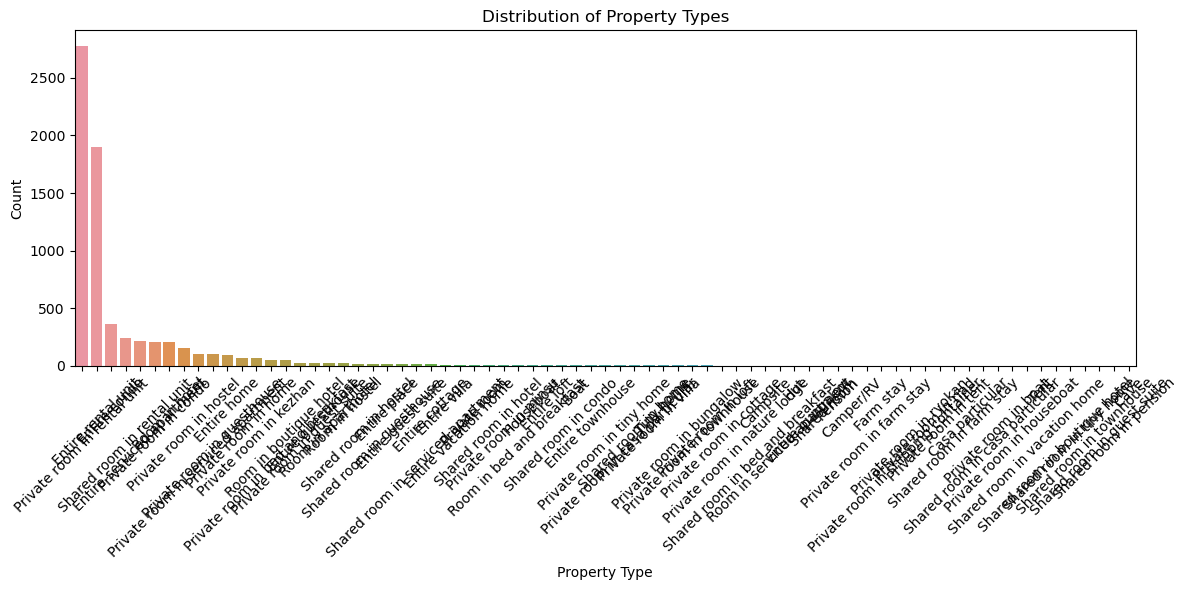

In [4]:
# Distribution of property types
plt.figure(figsize=(12, 6))
sns.countplot(x='property_type', data=df, order=df['property_type'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


display the graph of distribution of room types

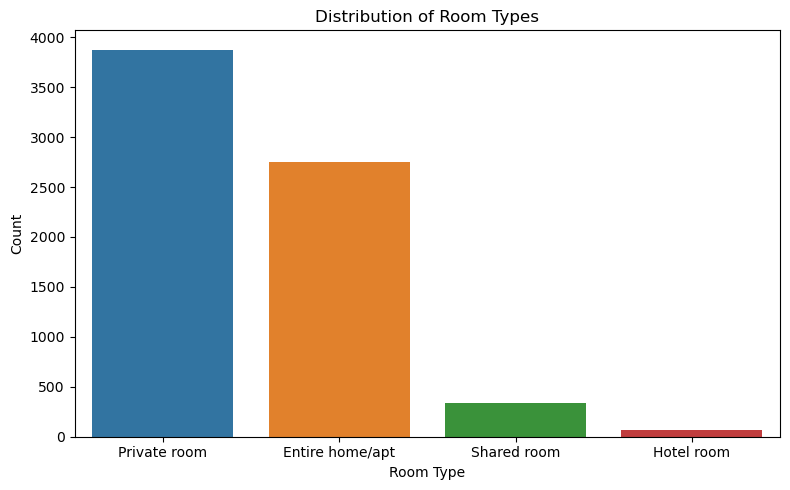

In [5]:
# Distribution of room types
plt.figure(figsize=(8, 5))
sns.countplot(x='room_type', data=df, order=df['room_type'].value_counts().index)
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

display the Scatter plot of price vs number of reviews

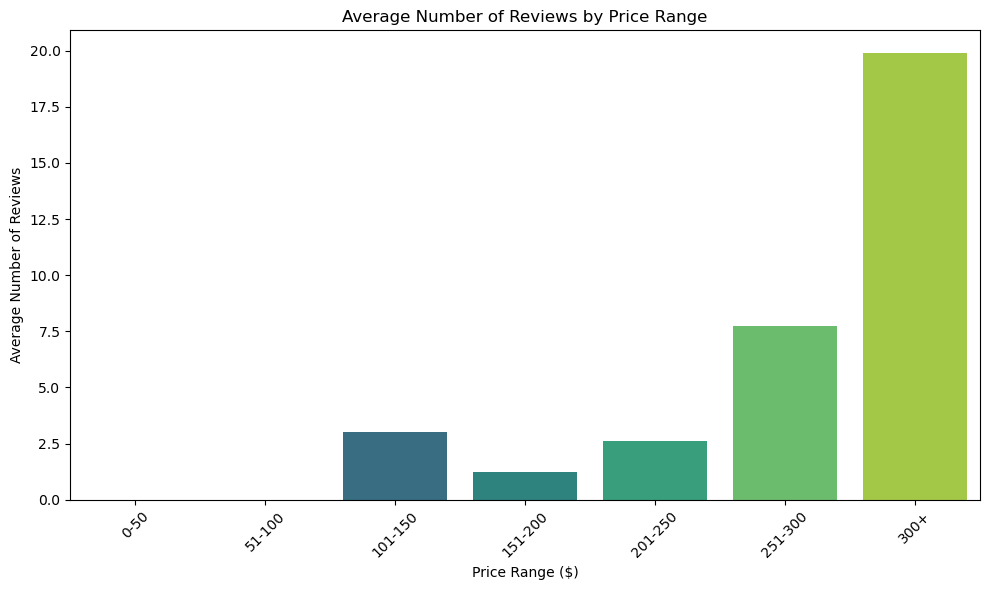

In [6]:
# Scatter plot of price vs number of reviews
df['price'] = pd.to_numeric(df['price'].replace('[\$,]', '', regex=True), errors='coerce')

# Define price ranges
price_bins = [0, 50, 100, 150, 200, 250, 300, np.inf]
price_labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '300+']

# Assign each row to a price range
df['price_range'] = pd.cut(df['price'], bins=price_bins, labels=price_labels, right=False)

# Calculate average number of reviews for each price range
average_reviews_by_price = df.groupby('price_range')['number_of_reviews'].mean().reset_index()

# Plot bar chart for average number of reviews by price range
plt.figure(figsize=(10, 6))
sns.barplot(x='price_range', y='number_of_reviews', data=average_reviews_by_price, palette='viridis')
plt.title('Average Number of Reviews by Price Range')
plt.xlabel('Price Range ($)')
plt.ylabel('Average Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Create a map of city and add Markers

In [27]:
m_1 = folium.Map(location=[22.286394,114.149139], tiles='cartodbpositron', zoom_start=10)

mc = MarkerCluster()
for idx, row in df.iterrows():
    if not math.isnan(row['longitude']) and not math.isnan(row['latitude']):
        mc.add_child(Marker([row['latitude'], row['longitude']]))

m_1.add_child(mc)

m_1